# Polynomial Regression

Dataset Overview:   
This dataset captures various physical dimensions of fish from different species, providing a rich source of data for analytical tasks such as species identification, weight prediction, and understanding the relationships between different physical attributes. The Species column helps differentiate between fish types, while the numerical features (Weight, Length1, Length2, Length3, Height, and Width) offer valuable insights into their size and physical characteristics. This dataset is particularly valuable for ecological studies, fisheries management, and machine learning applications focused on predicting fish weight from measurable traits.

In [60]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
# importing the dataset
data = pd.read_csv(r"C:\Users\himan\Desktop\ML\EDA\DataSets\Fish.csv")

In [62]:
data.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [63]:
data.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [64]:
# finding the numerical columns and categorical columns
numerical_col = data.select_dtypes(include = ['int64', 'float64']).columns.to_list()
categorical_col = data.select_dtypes(include = ['object']).columns.to_list()

print(numerical_col)
print(categorical_col) # The objrct

['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2', 'Length3']
['Species']


In [65]:
data.Species.value_counts() # viewing the numebr of fish in each category.

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [66]:
# Removing the species column because it contains non numeric data
data = data.drop(columns=['Species'])
data

,Category,Weight,Height,Width,Length1,Length2,Length3
0,1,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...
154,6,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,19.7,2.8728,2.0672,13.2,14.3,15.2


In [67]:
# seperating features and target variable
x = data.drop(columns = ['Weight'])
y = data['Weight']

In [68]:
# importing required modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [49]:
# Building a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)

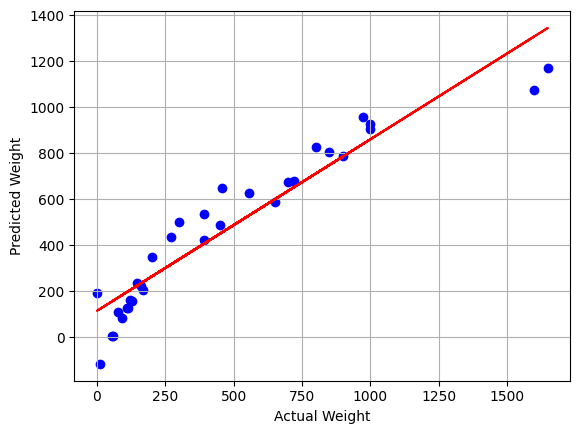

In [50]:
# Visualizing the results
plt.scatter(y_test, y_pred, color = 'blue')

# line of best fit
slope, intercept = np.polyfit(y_test, y_pred, 1)
line = slope * y_test + intercept
plt.plot(y_test, line, color='red', label='Best Fit Line')

plt.grid()
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

In [51]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2_val = r2_score(y_test, y_pred)
print(rmse, r2_val)

155.17817227812898 0.8734952284180403


The linear regression model is giving accuracy of 87.34% which is quite good.  
Now checking for Polynomial Regression model.

In [52]:
# Lets apply Polynomial regression to the dataset
poly = PolynomialFeatures(degree = 2, include_bias=True)

In [53]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [54]:
x_train_poly[0]

array([1.0000000e+00, 4.0000000e+00, 9.6000000e+00, 6.1440000e+00,
       5.6000000e+01, 6.0000000e+01, 6.4000000e+01, 1.6000000e+01,
       3.8400000e+01, 2.4576000e+01, 2.2400000e+02, 2.4000000e+02,
       2.5600000e+02, 9.2160000e+01, 5.8982400e+01, 5.3760000e+02,
       5.7600000e+02, 6.1440000e+02, 3.7748736e+01, 3.4406400e+02,
       3.6864000e+02, 3.9321600e+02, 3.1360000e+03, 3.3600000e+03,
       3.5840000e+03, 3.6000000e+03, 3.8400000e+03, 4.0960000e+03])

In [55]:
x_test_poly.shape

(32, 28)

In [56]:
# Fitting the model
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9623186920282267


Creating a Polynomial Pipeline

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
# Creating the Pipeline
def poly_pipeline(degree): # This degree will be passed by the user in the FrontEnd.
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree = degree, include_bias=True)
    linear_reg = LinearRegression()

    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("linear_regression", linear_reg)
    ])

    poly_regression.fit(x_train, y_train)
    y_pred_new = poly_regression.predict(x_new)

    # visualizing the data
    plt.plot(x_new, y_pred_new, 'r')
    plt.plot(x_train, y_train)
    plt.plot(x_test, y_test)
    plt.show()

In [72]:
poly_pipeline(5)

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but PolynomialFeatures is expecting 6 features as input.

This error we are getting is because we reused the poly_features object somewhere earlier outside the pipeline, which transformed x_train, and then we're using that transformed x_train to fit the pipeline.